# DS 3000 - Assignment 4 (Week 2)

**Student Name**: Janav Sama

**Date**: 05/14/2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Data Science Problem (50 pts)
### Instructions

You are hired as a Data Scientist for the NYC Taxi and Limousine Commission (TLC) and this company routinely collects trip data from all licensed cabs in NY. Your team would like to use this data in the future to understand how New Yorkers use these taxis. Your first assignment is to **analyze the data of the Green Taxis, and determine if its a viable source.**

Your supervisor has requested that you perform your analysis using data from February 2023 and would like for you to present your findings during the next team meeting. Use a Jupyter notebook to explain your data wrangling and analytical steps to your colleagues. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**`Note:`** Ensure that you explain the results from each question.


**In this assignment you will use the Pandas library. Pandas allows us to load data that's stored in a various formats, e.g. excel, csv, txt, parquet, etc. In this assignment, you will learn to read data in parquet format which is one of the preferred formats when working with `Big Data`. [Click here to learn more about parquet files](https://towardsdatascience.com/csv-files-for-storage-no-thanks-theres-a-better-option-72c78a414d1d)**

I also provided starter code below to help you to read the data in parquet format. First, you'll need to install a new library called *fastparquet*.

In [1]:
#run this cell to install the fast parquet library
!pip install fastparquet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [2]:
#let's load the data into a dataframe

tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet', #provide the URL to the data source
                      engine = 'fastparquet')

#Note: you'll notice two new things. 1) We are using a new function called `read_parquet()` which indicates that we are 
#      reading data in parquet format. 2) We used the fastparquet library as the engine. 
#      That's it! Pandas will load the data into a dataframe. You can now use the dataframe for EDA.

# Reminder: How does Pandas read other file formats?
# 1. Excel files: pd.read_excel()
# 2. CSV Files: pd.read_csv()
# ... and now you know how to read parquet files using pd.read_parquet()

## 2. Inspect the Data (5 pts) 
Inspect the data and perform the following: 
1. display the dimensions, and indicate if the variables have suitable types.
2. convert all variables to suitable types

In [3]:
# Displaying dimensions
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64809 entries, 0 to 64808
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64809 non-null  float64       
 1   lpep_pickup_datetime   64809 non-null  datetime64[us]
 2   lpep_dropoff_datetime  64809 non-null  datetime64[us]
 3   store_and_fwd_flag     59988 non-null  object        
 4   RatecodeID             59988 non-null  float64       
 5   PULocationID           64809 non-null  float64       
 6   DOLocationID           64809 non-null  float64       
 7   passenger_count        59988 non-null  float64       
 8   trip_distance          64809 non-null  float64       
 9   fare_amount            64809 non-null  float64       
 10  extra                  64809 non-null  float64       
 11  mta_tax                64809 non-null  float64       
 12  tip_amount             64809 non-null  float64       
 13  t

In [4]:
# Converting all variables to suitable types
tripdata_df['VendorID'] = tripdata_df['VendorID'].astype('category')
tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].astype('category')
tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].astype('category')
tripdata_df['PULocationID'] = tripdata_df['PULocationID'].astype('Int64')
tripdata_df['DOLocationID'] = tripdata_df['DOLocationID'].astype('Int64')
tripdata_df['passenger_count'] = tripdata_df['passenger_count'].astype('Int64')
tripdata_df['payment_type'] = tripdata_df['payment_type'].astype('category')
tripdata_df['trip_type'] = tripdata_df['trip_type'].astype('category')

In [5]:
# Validating changes
tripdata_df.dtypes

VendorID                       category
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag             category
RatecodeID                     category
PULocationID                      Int64
DOLocationID                      Int64
passenger_count                   Int64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                   category
trip_type                      category
congestion_surcharge            float64
dtype: object

## 3. Types of Data (2 pts) 
Are there any categorical data in this dataset. If they exist, demonstrate at least two categorical variables and indicate if they are nominal or ordinal (hint: read the data dictionary above which describes all fields in the data)

In [6]:
# Checking for categorical data 
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64809 entries, 0 to 64808
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64809 non-null  category      
 1   lpep_pickup_datetime   64809 non-null  datetime64[us]
 2   lpep_dropoff_datetime  64809 non-null  datetime64[us]
 3   store_and_fwd_flag     59988 non-null  category      
 4   RatecodeID             59988 non-null  category      
 5   PULocationID           64809 non-null  Int64         
 6   DOLocationID           64809 non-null  Int64         
 7   passenger_count        59988 non-null  Int64         
 8   trip_distance          64809 non-null  float64       
 9   fare_amount            64809 non-null  float64       
 10  extra                  64809 non-null  float64       
 11  mta_tax                64809 non-null  float64       
 12  tip_amount             64809 non-null  float64       
 13  t

In [7]:
# Identifying and indicating if they are nominal or ordinal 
nominal_columns = 'RatecodeID'
ordinal_columns = 'VendorID'

print("Nominal Data Types:")
print(nominal_columns)
print("\nOrdinal Data Types:")
print(ordinal_columns)

Nominal Data Types:
RatecodeID

Ordinal Data Types:
VendorID


## 4. Missing Values (10 pts) 
Evaluate the frequency of missing values in the dataset and perform the following:
1. explain if missing values are an isolated case or a widespread issue? 
2. what method would you recommend to handle missing data?
3. write the suitable code to handle the missing values.

Answers

1. Missing values seem to be a widespread issue. Some columns do not have a large number of data; and the column "ehail_fee" does not have any Non nan values.

2. Based on my understanding of the data types, the following can be done:
    - Impute the data: this process involves manipulating missing data using techniques, such as: mean, median and modedata from         the rest of the columns.
    - Deleting the columns/ empty values: deleting values helps maintain conistency across data given that data is missing on a          wide level.


In [8]:
# Counting the nan values in the columns
tripdata_df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4821
RatecodeID                4821
PULocationID                 0
DOLocationID                 0
passenger_count           4821
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                64809
improvement_surcharge        0
total_amount                 0
payment_type              4821
trip_type                 4826
congestion_surcharge      4821
dtype: int64

In [9]:
# Dropping the nan values in the column 'store_and_fwd_flag'
tripdata_df['store_and_fwd_flag'].value_counts(dropna=False) 
tripdata_df = tripdata_df.dropna(subset=['store_and_fwd_flag'])

In [10]:
# Validating change
tripdata_df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                59988
improvement_surcharge        0
total_amount                 0
payment_type                 0
trip_type                    5
congestion_surcharge         0
dtype: int64

In [11]:
# Deleting the 'ehail_fee' since it does not have any values
if 'ehail_fee' in tripdata_df.columns:
    tripdata_df.drop(columns='ehail_fee', inplace=True)

In [12]:
# Dropping the nan values in the column 'trip_type' 
tripdata_df = tripdata_df.dropna(subset=['trip_type'])
tripdata_df['trip_type'].value_counts(dropna=False)

trip_type
1.0    58270
2.0     1713
Name: count, dtype: int64

In [13]:
# Validating change
tripdata_df.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

## 5. Invalid Data (10 pts) 
Explore the data to determine if there are any invalid values and perform the following: 
1. demonstrate at least three issues that you found.
2. write suitable code to handle the invalid data that you found.

The three main issues I've discovered are:

1. Missing data: At the beginning (the raw data), there were 7 columns that were empty. Six columns had roughly the same number of missing values. This meant that it was missing during the exact time of entry for all of them, indicating that this could be accidental (the driver forgot to input) or intentional to manipulate or falsify the data. However, this was fixed earlier by removing the "ehail_fee" column that had no values at all and removing all the missing values in the rest of the columns to maintain unity.

2. Incomprehensive data: Some of the values, like the total amount (total fare amount), had negatives in them. This data does not represent any outcome of the ride and is invaluable for analysis. Such data was found in other columns, such as tip_amount, as well. Tip_amount and total amount could be manipulated if tip is received in cash. One method to prevent this is to remove any duplicates and change the variable types to something that matches the requirements. 

3. Data bias: If the drivers are being paid in a different format or have incentives to change the data to match the optimal expectations, this may lead to the drivers inputting incorrect or incomprehensive data. This could skew and influence our analysis in the wrong directions. To avoid this, data collectors need to motivate and remind the drivers of the purpose and possible effects the data they input might have. 

In [14]:
# Ensuring there are no duplicates
tripdata_df = tripdata_df.drop_duplicates().copy()

<span style='color:red'>**Answer the following questions using the prepared data.**</span>

## 6. Data Visualization (10 pts) 
Create bar charts that show: 
1. the most common way that New Yorkers request/hail a cab. 
2. the most common pick-up locations (display the top 5 locations). 
3. the most common drop-off locations (display the top 5 locations). 

Explain each chart.

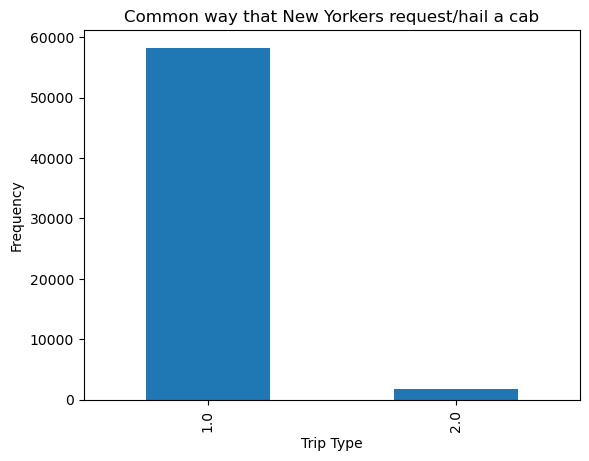

In [15]:
# Displaying the most common way New Yorkers start a ride
common_pickup = tripdata_df['trip_type'].value_counts().sort_values(ascending=False)
common_pickup.plot(kind='bar', xlabel='Trip Type', ylabel='Frequency', title='Common way that New Yorkers request/hail a cab')
plt.show()

1. Based on chart above, New Yorkers prefer hailing a cab on the spot. Number 1 represents the number of rides that were hail based and Number 2 represents dispatched/summoned rides. 

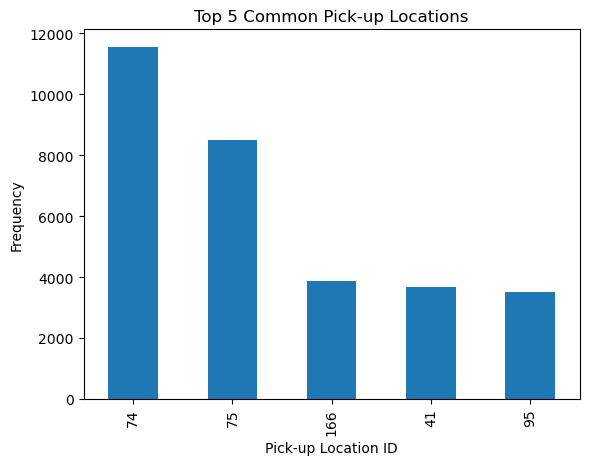

In [16]:
# Displaying the top 5 pick-up locations
common_pickup = tripdata_df['PULocationID'].value_counts().sort_values(ascending=False).nlargest(5)
common_pickup.plot(kind='bar', xlabel='Pick-up Location ID', ylabel='Frequency', title='Top 5 Common Pick-up Locations')
plt.show()

2. Common pick-up bar chart represents the number of times a ride was requested at a specific location. Its the TLC Taxi Zone in which the taximeter was engaged. The most common place was ID'd as "74", "75" and "41" 

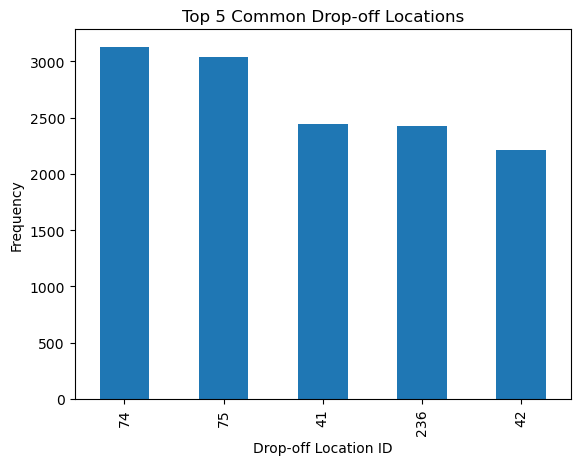

In [17]:
# Displaying the top 5 drop-off locations
common_pickup = tripdata_df['DOLocationID'].value_counts().sort_values(ascending=False).nlargest(5)
common_pickup.plot(kind='bar', xlabel='Drop-off Location ID', ylabel='Frequency', title='Top 5 Common Drop-off Locations')
plt.show()

3. Common drop-off bar chart represents the number of times a ride was completed at a specific location. Stands for the TLC Taxi Zone in which the taximeter was disengaged. The most common place was ID'd as "74", "75" and "42". These locations were also the most common pick-up points for the month of February suggesting that most trip were round trips for the drivers/riders. 

## 7. Data Analysis (10 pts)
Write suitable code to answer the following:
1. On average, how far do New Yorkers usually travel using these taxis?
2. What is the most expensive and least expensive trip? 
3. What is the minimum, average and maximum **tip amount** for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)? 

Explain the results.

In [18]:
# Displaying basic insights of the column to identify the average
tripdata_df['trip_distance'].describe()

count    59983.000000
mean         2.703500
std         26.549334
min          0.000000
25%          1.100000
50%          1.800000
75%          3.100000
max       6470.330000
Name: trip_distance, dtype: float64

1. On average, how far do New Yorkers usually travel using these taxis?

   2.70 miles. This is understandable since an average New York cab might be expensive to ride in on long distances. Therefore people might prefer taking the subway instead. Prices might have to go down to increase the average.

In [19]:
# Displaying basic insights to identify the max and min values of the column
tripdata_df['total_amount'].describe()

count    59983.000000
mean        21.443479
std         14.543921
min        -68.000000
25%         12.620000
50%         17.700000
75%         25.750000
max        441.000000
Name: total_amount, dtype: float64

2. What is the most expensive and least expensive trip?

   Most expensive: $441.0 
   
   Least expensive: $0 
   
   (min is displayed as "-68" however since this is not a valid input in this context it can be assumed as $0)

   Total cost for the trip is heavily dependent on the total distance traveled. Longer distances tend to have a higher total cost.

In [20]:
# Using conditions and 'describe' to calculate the conditional values
under_2_miles = tripdata_df[tripdata_df['trip_distance'] < 2]
under_2_miles_stats = under_2_miles['tip_amount'].describe()

over_2_miles = tripdata_df[tripdata_df['trip_distance'] > 2]
over_2_miles_stats = over_2_miles['tip_amount'].describe()

print("Tips for trips under 2 miles:")
print("Minimum:", under_2_miles_stats['min'])
print("Average:", under_2_miles_stats['mean'])
print("Maximum:", under_2_miles_stats['max'])
print()
print("Tips for trips over 2 miles:")
print("Minimum:", over_2_miles_stats['min'])
print("Average:", over_2_miles_stats['mean'])
print("Maximum:", over_2_miles_stats['max'])

Tips for trips under 2 miles:
Minimum: -0.9
Average: 1.3186187494327977
Maximum: 80.0

Tips for trips over 2 miles:
Minimum: 0.0
Average: 3.002086074046232
Maximum: 75.82


3. What is the minimum, average and maximum **tip amount** for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)?

   This might be an outlier or just a one time thing for the max to be higher for a trip that is under 2 miles since people generally tip more on longer trips. However, excluding that one case, the average seems to be consistent as trips over 2 miles have an average tip of $3 and lower than those with lesser than 2 miles.  

## 8. Findings (3 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

In [21]:
# Taking a look at the final, cleaned Dataframe to analyze data
tripdata_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2023-02-01 00:46:22,2023-02-01 01:05:57,N,1.0,74,265,1,10.80,42.9,1.0,1.5,0.00,0.0,1.0,45.40,2.0,1.0,0.00
1,2.0,2023-02-01 00:05:09,2023-02-01 00:22:42,N,1.0,216,196,1,4.76,23.3,1.0,0.5,0.00,0.0,1.0,25.80,2.0,1.0,0.00
2,2.0,2023-02-01 00:03:47,2023-02-01 00:27:30,N,1.0,7,114,1,6.32,30.3,1.0,0.5,8.89,0.0,1.0,44.44,1.0,1.0,2.75
3,2.0,2023-01-31 23:30:56,2023-01-31 23:51:40,N,1.0,74,239,1,3.50,16.3,1.0,0.5,0.00,0.0,1.0,21.55,2.0,1.0,2.75
4,2.0,2023-02-01 00:15:05,2023-02-01 00:26:02,N,1.0,82,223,1,3.14,17.0,1.0,0.5,0.00,0.0,1.0,19.50,2.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59983,2.0,2023-02-28 23:17:57,2023-02-28 23:24:30,N,1.0,130,215,1,1.45,9.3,1.0,0.5,0.00,0.0,1.0,11.80,1.0,1.0,0.00
59984,2.0,2023-03-01 00:01:06,2023-03-01 00:03:33,N,1.0,191,122,1,0.78,5.8,1.0,0.5,0.00,0.0,1.0,8.30,2.0,1.0,0.00
59985,2.0,2023-02-28 23:33:40,2023-02-28 23:42:16,N,1.0,74,24,1,1.50,9.3,1.0,0.5,0.00,0.0,1.0,11.80,2.0,1.0,0.00
59986,2.0,2023-02-28 23:21:27,2023-02-28 23:36:36,N,1.0,95,258,1,3.01,17.0,1.0,0.5,3.90,0.0,1.0,23.40,1.0,1.0,0.00


Based on the preliminary analysis of the provided data, there are several factors to consider in determining whether it is a viable source for understanding how New Yorkers use taxis:

Data Completeness: The dataset seems relatively complete, with columns for key variables such as pickup and dropoff times, trip distances, fare amounts, passenger counts, and payment types. This completeness is crucial for any analysis.

Data Consistency: The consistency of the data is important to ensure its reliability. This includes consistency in formatting, data types, and any potential outliers or anomalies. So far, this has been accomplished on a preliminary level. Further exploration is needed to verify consistency across the dataset.

Representativeness: To be useful for understanding how New Yorkers use taxis, the dataset needs to be representative of taxi usage patterns in the city. This would require a large and diverse sample of trips across different times and locations throughout the city. 

Data Quality: The quality of the data is essential. This includes accuracy, reliability, and the absence of errors or biases. Most of the cleaning and data manipulation have helped make the data ready for analysis.

Scope: The dataset appears to cover taxi trips in New York City over a period of time. However, the specific time range and geographical coverage may not be sufficient for comprehensive analysis; expanding the time line and the range of taxis might help us give a clearer picture. 

In summary, while the preliminary analysis suggests that the dataset contains relevant information for understanding taxi usage in New York City, further examination is necessary to determine its viability.

## Citations:

- “How to Convert Dtype=‘Datetime64[Ns]’ to Float?” Stack Overflow, stackoverflow.com/questions/68441559/how-to-convert-dtype-datetime64ns-to-float. Accessed 13 May 2024.

- “Pandas.DataFrame.nlargest — Pandas 1.1.4 Documentation.” Pandas.pydata.org, pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nlargest.html. Accessed 13 May 2024.

- “About TLC - TLC.” Nyc.gov, 2018, www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page. Accessed 13 May 2024.